In [1]:
#imports
import pandas as pd
import datetime
import seaborn as sns

In [2]:
#original data
df = pd.read_csv(r'/Users/greyhaneberg/Downloads/a_problem_with_presidents-main/data.csv')
df.drop(index=df.index[-1], axis=0, inplace=True)
print(df)

                 PRESIDENT     BIRTH DATE              BIRTH PLACE  \
0        George Washington   Feb 22, 1732    Westmoreland Co., Va.   
1               John Adams   Oct 30, 1735            Quincy, Mass.   
2         Thomas Jefferson   Apr 13, 1743       Albemarle Co., Va.   
3            James Madison   Mar 16, 1751         Port Conway, Va.   
4             James Monroe   Apr 28, 1758    Westmoreland Co., Va.   
5        John Quincy Adams  July 11, 1767            Quincy, Mass.   
6           Andrew Jackson   Mar 15, 1767  Waxhaws, No/So Carolina   
7         Martin Van Buren    Dec 5, 1782     Kinderhook, New York   
8   William Henry Harrison    Feb 9, 1773    Charles City Co., Va.   
9               John Tyler   Mar 29, 1790    Charles City Co., Va.   
10           James K. Polk    Nov 2, 1795    Mecklenburg Co., N.C.   
11          Zachary Taylor   Nov 24, 1784       Orange County, Va.   
12        Millard Fillmore    Jan 7, 1800     Cayuga Co., New York   
13         Franklin 

In [3]:
#year_of_birth
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
year_of_birth = df['BIRTH DATE'].dt.year
df['YEAR OF BIRTH'] = df['BIRTH DATE'].dt.year
year_of_birth = [int(item) for item in year_of_birth]

In [4]:
#lived years 
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])
df['DEATH DATE'].fillna(datetime.datetime.now(), inplace=True)
df['LIVED YEARS'] = df['DEATH DATE'] - df['BIRTH DATE']
df['LIVED YEARS'] = df['LIVED YEARS'] / 365
df['LIVED YEARS'] = df['LIVED YEARS'].dt.days

In [5]:
#lived months 
df['LIVED MONTHS'] = df['DEATH DATE'] - df['BIRTH DATE']
df['LIVED MONTHS'] = df['LIVED MONTHS'] / 30
df['LIVED MONTHS'] = df['LIVED MONTHS'].dt.days

In [6]:
#lived days
df['LIVED DAYS'] = df['DEATH DATE'] - df['BIRTH DATE']
df['LIVED DAYS'] = df['LIVED DAYS'].dt.days
df['DEATH DATE'] = df['DEATH DATE'].dt.strftime('%Y-%m-%d')
print(df)

                 PRESIDENT BIRTH DATE              BIRTH PLACE  DEATH DATE  \
0        George Washington 1732-02-22    Westmoreland Co., Va.  1799-12-14   
1               John Adams 1735-10-30            Quincy, Mass.  1826-07-04   
2         Thomas Jefferson 1743-04-13       Albemarle Co., Va.  1826-07-04   
3            James Madison 1751-03-16         Port Conway, Va.  1836-06-28   
4             James Monroe 1758-04-28    Westmoreland Co., Va.  1831-07-04   
5        John Quincy Adams 1767-07-11            Quincy, Mass.  1848-02-23   
6           Andrew Jackson 1767-03-15  Waxhaws, No/So Carolina  1845-06-08   
7         Martin Van Buren 1782-12-05     Kinderhook, New York  1862-07-24   
8   William Henry Harrison 1773-02-09    Charles City Co., Va.  1841-04-04   
9               John Tyler 1790-03-29    Charles City Co., Va.  1862-01-18   
10           James K. Polk 1795-11-02    Mecklenburg Co., N.C.  1849-06-15   
11          Zachary Taylor 1784-11-24       Orange County, Va.  

In [7]:
#10 longest lived
longest_lived = df.sort_values('LIVED YEARS', ascending=False).head(10)
longest_lived = longest_lived.drop('BIRTH DATE', axis=1)
longest_lived = longest_lived.drop('BIRTH PLACE', axis=1)
longest_lived = longest_lived.drop('DEATH DATE', axis=1)
longest_lived = longest_lived.drop('LOCATION OF DEATH', axis=1)
longest_lived = longest_lived.drop('YEAR OF BIRTH', axis=1)

print(longest_lived)

           PRESIDENT  LIVED YEARS  LIVED MONTHS  LIVED DAYS
37      Jimmy Carter           99          1205       36168
39       George Bush           94          1150       34504
36       Gerald Ford           93          1137       34133
38     Ronald Reagan           93          1136       34088
1         John Adams           90          1103       33119
29    Herbert Hoover           90          1098       32943
31   Harry S. Truman           88          1079       32373
3      James Madison           85          1038       31150
2   Thomas Jefferson           83          1013       30397
35     Richard Nixon           81           989       29688


In [8]:
#10 shortest lived
shortest_lived = df.sort_values('LIVED YEARS').head(10)
shortest_lived = shortest_lived.drop('BIRTH DATE', axis=1)
shortest_lived = shortest_lived.drop('BIRTH PLACE', axis=1)
shortest_lived = shortest_lived.drop('DEATH DATE', axis=1)
shortest_lived = shortest_lived.drop('LOCATION OF DEATH', axis=1)
shortest_lived = shortest_lived.drop('YEAR OF BIRTH', axis=1)
print(shortest_lived)

             PRESIDENT  LIVED YEARS  LIVED MONTHS  LIVED DAYS
33     John F. Kennedy           46           565       16978
19   James A. Garfield           49           606       18202
10       James K. Polk           53           652       19583
15     Abraham Lincoln           56           683       20516
27   Warren G. Harding           57           703       21091
20      Chester Arthur           57           695       20863
23    William McKinley           58           713       21412
24  Theodore Roosevelt           60           732       21985
28     Calvin Coolidge           60           736       22099
42        Barack Obama           62           757       22712


In [9]:
#stats

mean = df['LIVED DAYS'].mean()
mean_series = pd.Series({'Mean': mean})
mean_series = round(mean_series)
weighted_avg = df['LIVED DAYS'].mean()
weighted_avg_series = pd.Series({'Weighted Average': mean})
weighted_avg_series = round(weighted_avg_series)
med = df['LIVED DAYS'].median()
med_series = pd.Series({'Median': med})
med_series = round(med_series)
mode = df['LIVED DAYS'].mode()
mode_series = pd.Series({'Mode': mode.iloc[0]})  # Mode might return multiple values, so take the first one
mode_series = round(mode_series)
min_ = df['LIVED DAYS'].min()
min_series = pd.Series({'Min': min_})
min_series = round(min_series)
max_ = df['LIVED DAYS'].max()
max_series = pd.Series({'Max': max_})
max_series = round(max_series)
std = df['LIVED DAYS'].std()
std_series = pd.Series({'Standard Deviation': std})
std_series = round(std_series)

# create a new dataframe with the results
#stat_table = pd.concat([stats, med, mode], axis=0)
stat_table = pd.concat([mean_series, weighted_avg_series, med_series, mode_series, min_series, max_series, std_series])

print(stat_table)

Mean                  26463.0
Weighted Average      26463.0
Median                26227.0
Mode                  16978.0
Min                   16978.0
Max                   36168.0
Standard Deviation     4609.0
dtype: float64


<AxesSubplot:xlabel='LIVED DAYS'>

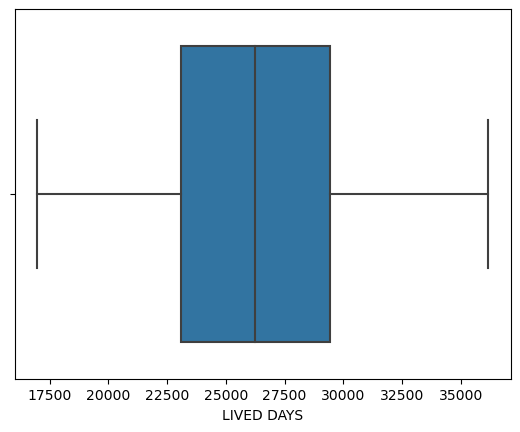

In [10]:
sns.boxplot(x=df['LIVED DAYS'])